In [132]:
# Import NumPy for numerical/math operations (shortened to 'np')
import numpy as np

# Import Pandas for data manipulation/analysis (shortened to 'pd')
import pandas as pd

# Import Matplotlib for creating static charts/plots (shortened to 'plt')
import matplotlib.pyplot as plt

# Import Seaborn for advanced statistical visualizations (shortened to 'sns')
import seaborn as sns

# Split datasets into training and testing subsets (e.g., 80% train, 20% test)
from sklearn.model_selection import train_test_split

# Import Logistic Regression for classification tasks (e.g., spam detection)
from sklearn.linear_model import LogisticRegression

# Calculate model accuracy (e.g., 95% correct predictions)
from sklearn.metrics import accuracy_score

# Convert text data into numerical features using TF-IDF (word importance scoring)
from sklearn.feature_extraction.text import TfidfVectorizer

# Naive Bayes classifiers: MultinomialNB (count-based text data), BernoulliNB (binary features)
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Import evaluation tools: confusion matrix, ROC curve, AUC score, classification report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Generate word frequency visualizations (e.g., frequent words in spam emails)
from wordcloud import WordCloud

# Split text into individual words/tokens (e.g., "hello world" → ["hello", "world"])
from nltk.tokenize import word_tokenize

# Access common stopwords (e.g., "the", "and") for text preprocessing
from nltk.corpus import stopwords

# Reduce words to base/dictionary form (e.g., "running" → "run")
from nltk.stem import WordNetLemmatizer

# Import Plotly Express for interactive charts/visualizations
import plotly.express as px

# Work with punctuation characters (e.g., removing commas, periods)
import string

# Control how warnings are displayed/handled
import warnings

# Ignore warning messages to keep output clean
warnings.filterwarnings('ignore')

In [133]:
data = pd.read_csv('WELFake_Dataset.csv')


In [134]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [135]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [136]:
data['text'][0]  # Real news, label: 0

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [137]:
data['text'][72133]  # fake news, label: 1, last row

'Goldman Sachs Endorses Hillary Clinton For President For Goldman Sachs, was there really any other choice this cycle? | October 27, 2016 Be Sociable, Share! Lloyd Blankfein, CEO of Goldman Sachs, is greeted by Hillary Clinton at a panel discussion at the Clinton Global Initiative, Sept. 24, 2014 in New York. \nPublished in partnership with Shadowproof . \nHe’s with her. On Sunday, former Secretary of State Hillary Clinton earned the endorsement of Goldman Sachs CEO Lloyd Blankfein —an endorsement she had been working toward for years. \nAs was revealed by Wikileaks, Hillary Clinton spent the run up to her presidential campaign giving speeches to Goldman Sachs and other Wall Street banks, where she praised their talents and explained her positions on financial regulation. \nOn October 24, 2013, Clinton told Goldman Sachs that Dodd-Frank had to be done mostly for “political reasons” because Congress needed to look like it was doing something about the crisis. She said, “There’s nothing 

In [138]:
# Check if the column exists before attempting to drop it
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


# Handling Null Values and separating Features from Labels

In [140]:
data.isnull().sum()

,0
title,558
text,39
label,0


In [141]:
data.fillna('',inplace=True)
# Replacing all missing (NaN) values in the DataFrame data with an empty string (''), updating data in place without creating a new DataFrame.

In [142]:
features = data[['title','text']]
labels = data['label']

# Visualisation of the dataset

In [143]:
# Count how many times each label appears (e.g., "Spam" vs "Ham")
label_Status = data['label'].value_counts()
print(label_Status)

# Get the label names from the counts (the unique labels: Spam and hams)
transactions = label_Status.index
print('transactions: ',transactions)

# Get the corresponding count numbers for each label
quantity = label_Status.values
print('quantity: ',quantity)

# Create a donut chart (a pie chart with a hole in the middle)
# 'values' sets the size of each slice using the count numbers,
# 'names' sets the slice labels using the unique labels,
# 'hole=0.6' creates a donut chart with a 60% hole in the middle,
# 'title' sets the chart title.
fig = px.pie(data, values=quantity, names=transactions, hole=0.6, title="Spam and Ham Status")

# Display the chart
fig.show()


label
1    37106
0    35028
Name: count, dtype: int64
transactions:  Index([1, 0], dtype='int64', name='label')
quantity:  [37106 35028]


# Word Clouds

In [144]:
def plot_wordcloud(text,title):
  wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.title(title)
  plt.axis('off')

fake_text = ''.join(data[data['label']==0]['text'])
real_text = ''.join(data[data['label']==1]['text'])


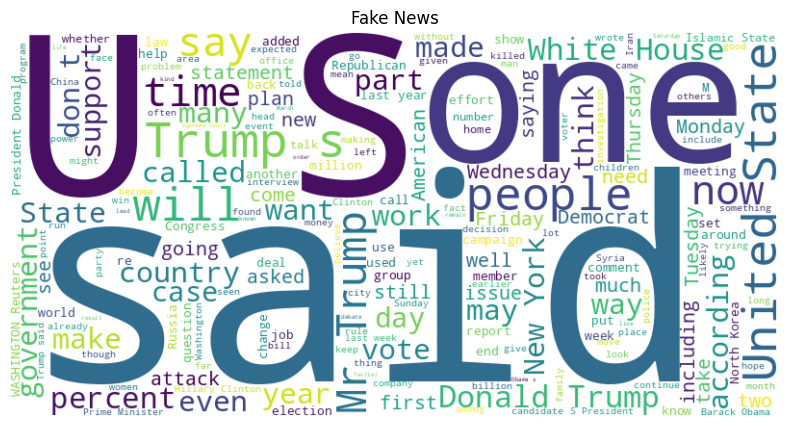

In [145]:
plot_wordcloud(fake_text,'Fake News')
plt.show()

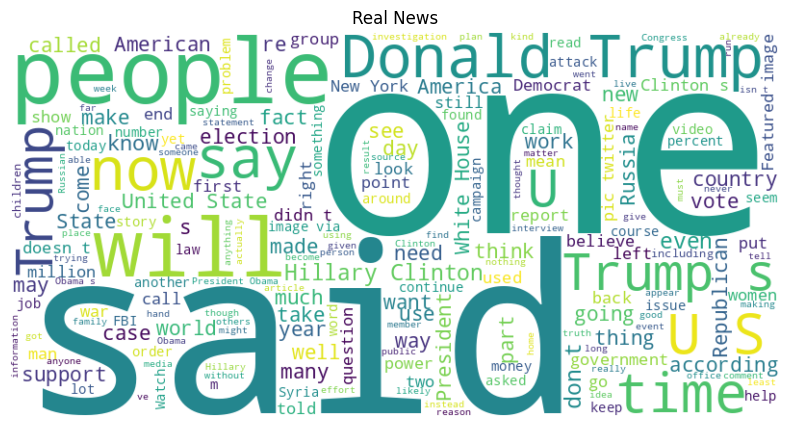

In [146]:
plot_wordcloud(real_text,'Real News')
plt.show()

# Text Processing

In [147]:
text_column = 'text'
label_column = 'label'

# Stopwords
Stopwords are common words (like "the", "is", "at", etc.) that are usually removed from text during preprocessing because they don't add much meaningful information for tasks like text analysis or natural language processing.

In [148]:
import nltk  # Import the Natural Language Toolkit for text processing

# Download the list of common English words (stopwords) that are usually filtered out in text analysis
nltk.download('stopwords')

from nltk.corpus import stopwords  # Import the stopwords module from nltk's corpus

# Create a set of English stopwords for quick look-up (sets help avoid duplicates and speed up membership testing)
stopword = set(stopwords.words('english'))

stopword  # Display the set of English stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# **string.punctuation**:
a string of punctuation symbols

In [149]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [150]:
def preprocess_text(text):
    # Define a function named 'preprocess_text' that takes a text string as input.

    remove_punc = [char for char in text if char not in string.punctuation]
    # For each character in 'text', check if it is not in 'string.punctuation'.
    # Create a list called 'remove_punc' containing only those characters (i.e., text without punctuation).

    clean_words = ''.join(remove_punc)
    # Join the list of characters in 'remove_punc' back into a single string.
    # The resulting string 'clean_words' is the original text without any punctuation.

    text = [word for word in clean_words.split() if word.lower() not in stopword]
    # Split 'clean_words' into individual words (using whitespace as the separator).
    # For each word, convert it to lowercase and include it in the new list only if it is not found in the 'stopword' set.
    # The variable 'text' now holds a list of words that are free of both punctuation and common stopwords.

    return text
    # Return the list of cleaned words.


In [151]:
data[text_column] = data[text_column].apply(preprocess_text)
data[text_column]

,text
0,"[comment, expected, Barack, Obama, Members, FY..."
1,"[post, votes, Hillary, already]"
2,"[demonstrators, gathered, last, night, exercis..."
3,"[dozen, politically, active, pastors, came, pr..."
4,"[RS28, Sarmat, missile, dubbed, Satan, 2, repl..."
...,...
72129,"[WASHINGTON, Reuters, Hackers, believed, worki..."
72130,"[know, fantasyland, Republicans, never, questi..."
72131,"[Migrants, Refuse, Leave, Train, Refugee, Camp..."
72132,"[MEXICO, CITY, Reuters, Donald, Trump’s, comba..."


# Lemmatization
The process of reducing a word to its base or dictionary form (called a lemma) by considering its meaning and context.

For example, "running", "ran", and "runs" all become "run".

In [152]:
import nltk
# Import the Natural Language Toolkit (nltk) library for text processing

nltk.download('wordnet')
# Download the WordNet corpus needed for lemmatization (a dictionary of words)

from nltk.stem import WordNetLemmatizer
# Import the WordNetLemmatizer class to convert words to their base form

lemmatizer = WordNetLemmatizer()
# Create an instance of WordNetLemmatizer

def lemmatize_text(text):
    # Define a function 'lemmatize_text' that will take a text string and return its lemmatized version.
    # Note: Iterating directly over 'text' treats it as a sequence of characters.
    # Typically, you would split the text into words first.
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    # For each element 'word' in the input 'text' (here, each character if not split),
    # apply the lemmatizer to convert it to its lemma, then join all the results back into a single string.
    return lemmatized_text  # Return the lemmatized string

data[text_column] = data[text_column].apply(lemmatize_text)
# Apply the 'lemmatize_text' function to every entry in the 'text_column' of the DataFrame 'data'
# and save the processed text back into that column.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [153]:
data[text_column]

,text
0,comment expected Barack Obama Members FYF911 F...
1,post vote Hillary already
2,demonstrator gathered last night exercising co...
3,dozen politically active pastor came private d...
4,RS28 Sarmat missile dubbed Satan 2 replace SS1...
...,...
72129,WASHINGTON Reuters Hackers believed working Ru...
72130,know fantasyland Republicans never questioned ...
72131,Migrants Refuse Leave Train Refugee Camp Hunga...
72132,MEXICO CITY Reuters Donald Trump’s combative s...


# TF-IDF Vectorization
Converts text into numerical features by assigning each word a score based on how frequently it appears in a document (TF) weighted by how rare it is across all documents (IDF), thus highlighting words that are both important to a particular document and uncommon in the overall collection.

In [154]:
vectorizer = TfidfVectorizer()
# Create a TF-IDF vectorizer object that will convert text data into numerical features based on term frequency and inverse document frequency.

x = vectorizer.fit_transform(data[text_column])
# Fit the vectorizer on the text data in 'data[text_column]' and then transform this text into a numerical matrix.
# Each row corresponds to a document and each column to a unique word, with values representing TF-IDF scores.

y = data[label_column]
# Extract the target variable (labels) from the DataFrame using the column name stored in 'label_column'.


# Splitting dataset into training and testing sets

In [155]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

# Evaluate Naive Bayes models
Naive Bayes is based on **Bayes’ Theorem**, a math rule that helps us figure out the chance of something based on what we already know. Here’s the basic idea:
- You want to know: "Given these features, how likely is this class?"
- Bayes’ Theorem uses probabilities from past data to answer this.

In math terms, Bayes’ Theorem is:

$ P(\text{class}|\text{features}) = \frac{P(\text{features}|\text{class}) \cdot P(\text{class})}{P(\text{features})} $

Let’s break it down:
- $ P(\text{class}|\text{features}) $: Probability of the class (e.g., Spam) given the features (e.g., email words). This is what we want!
- $ P(\text{features}|\text{class}) $: Probability of seeing these features if we know the class (e.g., how likely are these words if it’s Spam?).
- $ P(\text{class}) $: Probability of the class by itself (e.g., how common is Spam?).
- $ P(\text{features}) $: Probability of the features overall (e.g., how common are these words?).

In [156]:
# Evaluates a classification model's performance using multiple metrics
# Why? Different metrics reveal different aspects of model behavior
def evaluate_model(model, xtest, ytest):

    y_pred = model.predict(xtest)
     # Step 1: Get class predictions (hard labels)
    # Converts probability outputs to final decisions (0/1 in binary classification)

    accuracy = accuracy_score(ytest, y_pred)

    # Step 2: Calculate accuracy
    # Simple ratio of correct predictions to total predictions
    # Good for balanced classes, but misleading for imbalanced data


    cm = confusion_matrix(ytest, y_pred)
     # Step 3: Generate confusion matrix
    # Reveals specific error types:
    # - False Positives (Type I errors)
    # - False Negatives (Type II errors)
    # Essential for understanding error distribution


    prob = model.predict_proba(xtest)[:,1]
     # Step 4: Get probability estimates
    # Shows model's confidence in predictions (0-1 values)
    # [:,1] selects probabilities for positive class (class=1)
    # Why probabilities? Needed for threshold-sensitive metrics


    roc_auc = roc_auc_score(ytest, prob)
     # Step 5: Calculate ROC AUC
    # Measures overall class separation capability:
    # - 1.0 = perfect separation
    # - 0.5 = random guessing
    # Good for balanced classification problems


    precision, recall, _ = precision_recall_curve(ytest, prob)
     # Step 6: Precision-Recall Curve components
    # Precision: How many selected items are relevant? (Quality)
    # Recall: How many relevant items are selected? (Coverage)
    # The '_' captures thresholds we don't need explicitly


    pr_auc = auc(recall, precision)
     # Step 7: Calculate PR AUC
    # Area Under Precision-Recall Curve
    # Better metric than ROC AUC when:
    # - Classes are imbalanced
    # - Focus is on positive class performance


    return {
        'accuracy': accuracy,         # Overall correctness
        'confusion_matrix': cm,      # Error type breakdown
        'roc_auc': roc_auc,          # Class separation quality
        'pr_auc': pr_auc             # Precision/recall tradeoff
    }
     # Return comprehensive performance report

# **Build Naive Bayes Models**

# Multinomial Naive Bayes

In [157]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# Initialize Multinomial Naive Bayes classifier with:
# - alpha=1.0 (Laplace smoothing to handle zero probabilities)
# - fit_prior=True (learn class probabilities from data)
# - class_prior=None (no pre-set class probabilities)

mnb_model.fit(xtrain, ytrain)
# Train the model using:
# - xtrain: Feature matrix (word counts/TF-IDF values for text data)
# - ytrain: Target labels (categories/classes)
# Learns P(features|class) probabilities for classification

MultinomialNB()

In [158]:
from sklearn.metrics import precision_recall_curve, auc

In [159]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'accuracy': 0.8766692851531814,
 'confusion_matrix': array([[9713,  900],
        [1769, 9259]]),
 'roc_auc': 0.9488532671570762,
 'pr_auc': 0.9482007077800101}

**Model Performance Summary**
- **Accuracy**: 87.7% → Correct predictions 9/10 times  
- **Confusion Matrix**:  
  ✅ True Positives: 9,259 | ❌ False Negatives: 1,769  
  ✅ True Negatives: 9,713 | ❌ False Positives: 900  
- **ROC AUC**: 0.949 → Excellent class separation (1.0 = perfect)  
- **PR AUC**: 0.948 → Strong precision-recall balance  

**Key Takeaway**: Robust performance with good error balance.  
**Next Step**: Check if false negatives/positives align with business costs.

In [160]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



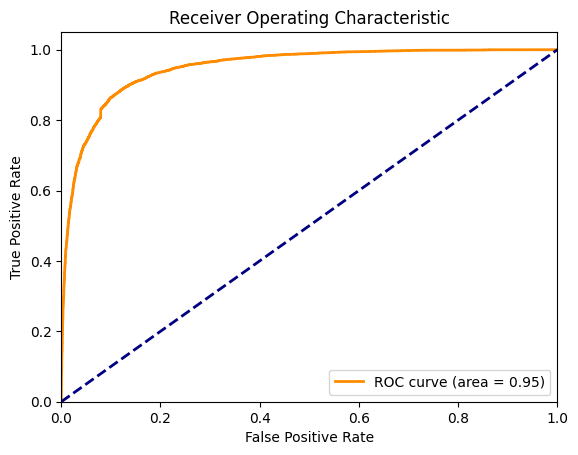

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



fpr, tpr, thresholds = roc_curve(ytest, mnb_model.predict_proba(xtest)[:, 1]) # Calculate ROC curve
roc_auc = auc(fpr, tpr) # Calculate AUC

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**ROC** = Receiver Operating Characteristic  
▶ **What it shows**: Trade-off between:  
   - `True Positive Rate` (good detections ↗️)  
   - `False Positive Rate` (false alarms ↘️)  

**ROC AUC** = Area Under ROC Curve  
- `1.0` = Perfect classifier 🏆  
- `0.9` = Great (yours: 0.949 ✅)  
- `0.5` = Random guessing 🎲  

- **ROC AUC (0.949)**:  
  - "How well model separates classes?"  
  - 1.0 = Perfect, 0.5 = Coin flip  
  - >0.9 = Excellent!  

- **PR AUC (0.948)**:  
  - "How good at finding positives?"  
  - Better for rare events  
  - >0.9 = Superb!  



# Bernoulli Naive Bayes

In [162]:
bnb_model = BernoulliNB(alpha=1.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [163]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'accuracy': 0.8547664156000185,
 'confusion_matrix': array([[8575, 2038],
        [1105, 9923]]),
 'roc_auc': 0.9418910289633566,
 'pr_auc': 0.9527734422544304}

In [164]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[8575, 2038],
       [1105, 9923]])

<Axes: >

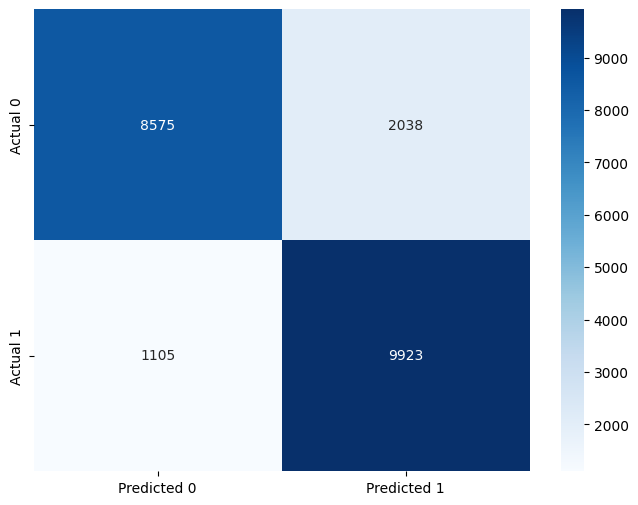

In [165]:
# create a heatmap

plt.figure(figsize=(8,6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [166]:
print (classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



# **Apply Logistic Regression**
logistic regression is a classification algorithm, not regression despite its name. It's used when the dependent variable is categorical. The most common case is binary classification, like yes/no or 0/1 outcomes.

In [167]:
lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [168]:
lr_results = evaluate_model(lr_model, xtest, ytest)
lr_results

{'accuracy': 0.9503257705281641,
 'confusion_matrix': array([[ 9956,   657],
        [  418, 10610]]),
 'roc_auc': 0.9895132836621794,
 'pr_auc': 0.9894342726168536}

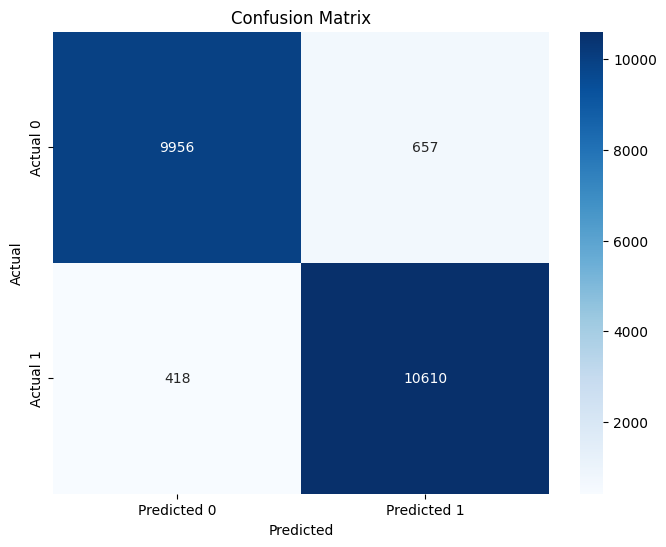

In [169]:
# Creating a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(lr_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

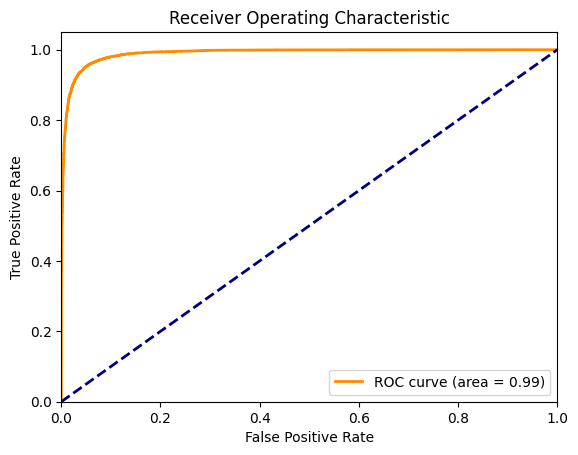

In [170]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = lr_model.predict_proba(xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Visualize Performance with histogram **

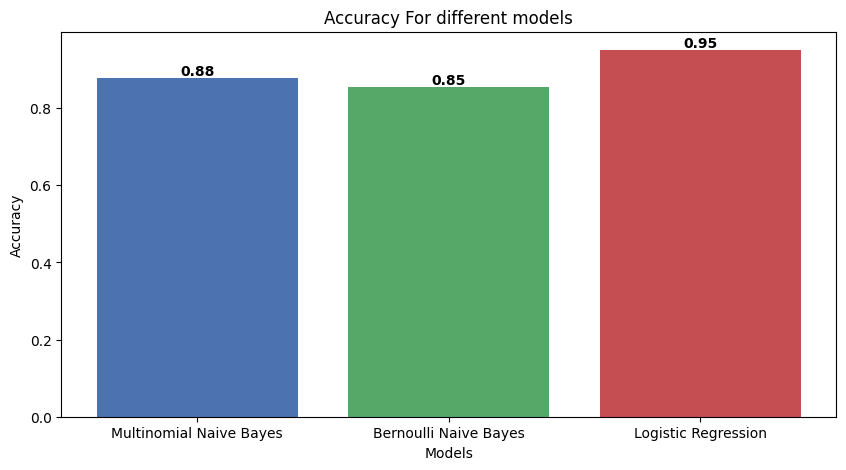

In [171]:
def plot_histogram (metric_values, model_names, metric_name):
  fig, ax = plt.subplots(figsize=(10,5))
  bars = plt.bar(model_names, metric_values, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
  plt.xlabel('Models')
  plt.ylabel(metric_name)
  plt.title(f'{metric_name} For different models')

def plot_histogram (metric_values, model_names, metric_name):
  fig, ax = plt.subplots(figsize=(10,5))
  bars = plt.bar(model_names, metric_values, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
  plt.xlabel('Models')
  plt.ylabel(metric_name)
  plt.title(f'{metric_name} For different models')

  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color = 'black', fontweight = 'bold')

  plt.show()

accuracy_values = [nb_results['accuracy'], bnb_results['accuracy'], lr_results['accuracy']]
model_names = ['Multinomial Naive Bayes','Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')


# Input Random Text and make a prediction

In [172]:
models = [mnb_model, bnb_model, lr_model]

In [187]:
random_text = input()
preprocessed_text = preprocess_text(random_text) #store result in a different variable
lemmatized_text = lemmatize_text(preprocessed_text) #pass the variable with the correct value
text_vector = vectorizer.transform([lemmatized_text])

A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an â€œevangelical Catholic.â€  Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to â€œsave my soul,â€ reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.  â€œI was struck, and struck hard,â€ Jindal told the pastors. â€œThis was the Son of God, and He had died for our sins.â€  Jindalâ€™s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidate

In [188]:
preprocessed_text



['dozen',
 'politically',
 'active',
 'pastors',
 'came',
 'private',
 'dinner',
 'Friday',
 'night',
 'hear',
 'conversion',
 'story',
 'unique',
 'context',
 'presidential',
 'politics',
 'Louisiana',
 'Gov',
 'Bobby',
 'Jindal',
 'traveled',
 'Hinduism',
 'Protestant',
 'Christianity',
 'ultimately',
 'became',
 'calls',
 'â€œevangelical',
 'Catholicâ€\x9d',
 'two',
 'hours',
 'Jindal',
 '42',
 'recalled',
 'talking',
 'girl',
 'high',
 'school',
 'wanted',
 'â€œsave',
 'soulâ€\x9d',
 'reading',
 'Bible',
 'closet',
 'parents',
 'would',
 'see',
 'feeling',
 'stir',
 'watching',
 'movie',
 'senior',
 'year',
 'depicted',
 'Jesus',
 'cross',
 'â€œI',
 'struck',
 'struck',
 'hardâ€\x9d',
 'Jindal',
 'told',
 'pastors',
 'â€œThis',
 'Son',
 'God',
 'died',
 'sinsâ€\x9d',
 'Jindalâ€™s',
 'session',
 'Christian',
 'clergy',
 'lead',
 'congregations',
 'early',
 'presidential',
 'battleground',
 'states',
 'Iowa',
 'South',
 'Carolina',
 'part',
 'behindthescenes',
 'effort',
 'Louisiana'

In [189]:
lemmatized_text

'dozen politically active pastor came private dinner Friday night hear conversion story unique context presidential politics Louisiana Gov Bobby Jindal traveled Hinduism Protestant Christianity ultimately became call â€œevangelical Catholicâ€\x9d two hour Jindal 42 recalled talking girl high school wanted â€œsave soulâ€\x9d reading Bible closet parent would see feeling stir watching movie senior year depicted Jesus cross â€œI struck struck hardâ€\x9d Jindal told pastor â€œThis Son God died sinsâ€\x9d Jindalâ€™s session Christian clergy lead congregation early presidential battleground state Iowa South Carolina part behindthescenes effort Louisiana governor find political base could help propel top tier Republican candidate seeking run White House 2016 Known GOP circle mostly mastery policy issue health care Jindal Rhodes Scholar graduate Ivy Leagueâ€™s Brown University obvious pool activist supporter help drive excitement outside home state harnessing religious experience way begun app

In [190]:
text_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 506 stored elements and shape (1, 363127)>

In [191]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [194]:
for model in models:
  prediction = model.predict(text_vector)
  print(f"Model: {type(model).__name__}")
  print(f"Prediction: {'Fake News' if prediction[0] == 1 else 'Real News'}")
  print("\n")

Model: MultinomialNB
Prediction: Real News


Model: BernoulliNB
Prediction: Real News


Model: LogisticRegression
Prediction: Real News




# Saving this model for Deployment

In [195]:
import joblib


# Save the models
joblib.dump(mnb_model, 'mnb_model.joblib')
joblib.dump(bnb_model, 'bnb_model.joblib')
joblib.dump(lr_model, 'lr_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')





['tfidf_vectorizer.joblib']

# Load Model

In [196]:
mnb_model_loaded = joblib.load('mnb_model.joblib')
bnb_model_loaded = joblib.load('bnb_model.joblib')
lr_model_loaded = joblib.load('lr_model.joblib')
vectorizer_loaded = joblib.load('tfidf_vectorizer.joblib')

In [197]:
# Example text for testing
test_text = "This is a test sentence to check if the model can correctly classify it as real or fake news"

# Preprocess the text
preprocessed_text = preprocess_text(test_text)
lemmatized_text = lemmatize_text(preprocessed_text)

# Vectorize the text using the loaded vectorizer
text_vector = vectorizer_loaded.transform([lemmatized_text])

# Make predictions using each of the loaded models
models = [mnb_model_loaded, bnb_model_loaded, lr_model_loaded]
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print(f"Prediction: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("\n")


Model: MultinomialNB
Prediction: Fake News


Model: BernoulliNB
Prediction: Fake News


Model: LogisticRegression
Prediction: Fake News


